In [29]:
import pandas as pd
import numpy as np

# Data Loading

In [30]:
train = pd.read_csv('/kaggle/input/osic-pulmonary-fibrosis-progression/train.csv')
test = pd.read_csv('/kaggle/input/osic-pulmonary-fibrosis-progression/test.csv')
sub = pd.read_csv('/kaggle/input/osic-pulmonary-fibrosis-progression/sample_submission.csv')
train.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [31]:
test.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked


In [32]:
sub.head()

,Patient_Week,FVC,Confidence
0,ID00419637202311204720264_-12,2000,100
1,ID00421637202311550012437_-12,2000,100
2,ID00422637202311677017371_-12,2000,100
3,ID00423637202312137826377_-12,2000,100
4,ID00426637202313170790466_-12,2000,100


# Data Constructing

In [33]:
train['col'] = train.apply(lambda x: x['Patient'] + '_' + str(x['Weeks']), axis=1) 

In [34]:
train.insert(loc=0, column='Patient_Week', value=train['col'].tolist())
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient_Week   1549 non-null   object 
 1   Patient        1549 non-null   object 
 2   Weeks          1549 non-null   int64  
 3   FVC            1549 non-null   int64  
 4   Percent        1549 non-null   float64
 5   Age            1549 non-null   int64  
 6   Sex            1549 non-null   object 
 7   SmokingStatus  1549 non-null   object 
 8   col            1549 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 109.0+ KB


In [35]:
train.head(50)

,Patient_Week,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,col
0,ID00007637202177411956430_-4,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker,ID00007637202177411956430_-4
1,ID00007637202177411956430_5,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker,ID00007637202177411956430_5
2,ID00007637202177411956430_7,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker,ID00007637202177411956430_7
3,ID00007637202177411956430_9,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker,ID00007637202177411956430_9
4,ID00007637202177411956430_11,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker,ID00007637202177411956430_11
5,ID00007637202177411956430_17,ID00007637202177411956430,17,2101,52.868646,79,Male,Ex-smoker,ID00007637202177411956430_17
6,ID00007637202177411956430_29,ID00007637202177411956430,29,2000,50.327126,79,Male,Ex-smoker,ID00007637202177411956430_29
7,ID00007637202177411956430_41,ID00007637202177411956430,41,2064,51.937594,79,Male,Ex-smoker,ID00007637202177411956430_41
8,ID00007637202177411956430_57,ID00007637202177411956430,57,2057,51.761449,79,Male,Ex-smoker,ID00007637202177411956430_57
9,ID00009637202177434476278_8,ID00009637202177434476278,8,3660,85.282878,69,Male,Ex-smoker,ID00009637202177434476278_8


#草稿 base 变换，base fvc特殊，sex和ss变化特征值

In [36]:
output = pd.DataFrame()
output

""


In [37]:
groupby = train.groupby('Patient')
output = pd.DataFrame()
for _,tr in groupby:
    tr['base_week'] = tr['Weeks'].min()
    tr = tr.rename(columns={'Weeks': 'predict_Week','Percent':'base_Percent','Age':'base_Age'})
    tr['Week_passed'] = tr['predict_Week'] - tr['base_week']
    tr['base_FVC'] = tr['FVC'].min()
    output = pd.concat([output, tr])
output = output[output['Week_passed'] != 0].reset_index(drop=True)

In [38]:
output

,Patient_Week,Patient,predict_Week,FVC,base_Percent,base_Age,Sex,SmokingStatus,col,base_week,Week_passed,base_FVC
0,ID00007637202177411956430_5,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker,ID00007637202177411956430_5,-4,9,2000
1,ID00007637202177411956430_7,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker,ID00007637202177411956430_7,-4,11,2000
2,ID00007637202177411956430_9,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker,ID00007637202177411956430_9,-4,13,2000
3,ID00007637202177411956430_11,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker,ID00007637202177411956430_11,-4,15,2000
4,ID00007637202177411956430_17,ID00007637202177411956430,17,2101,52.868646,79,Male,Ex-smoker,ID00007637202177411956430_17,-4,21,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
1362,ID00426637202313170790466_13,ID00426637202313170790466,13,2712,66.594637,73,Male,Never smoked,ID00426637202313170790466_13,0,13,2712
1363,ID00426637202313170790466_19,ID00426637202313170790466,19,2978,73.126412,73,Male,Never smoked,ID00426637202313170790466_19,0,19,2712
1364,ID00426637202313170790466_31,ID00426637202313170790466,31,2908,71.407524,73,Male,Never smoked,ID00426637202313170790466_31,0,31,2712
1365,ID00426637202313170790466_43,ID00426637202313170790466,43,2975,73.052745,73,Male,Never smoked,ID00426637202313170790466_43,0,43,2712


In [39]:
output['FVC_copy'] = output['FVC']
rename_cols = {'FVC_copy': 'FVC'}
output = output.drop(columns=['col','FVC']).rename(columns=rename_cols)

In [40]:
output

,Patient_Week,Patient,predict_Week,base_Percent,base_Age,Sex,SmokingStatus,base_week,Week_passed,base_FVC,FVC
0,ID00007637202177411956430_5,ID00007637202177411956430,5,55.712129,79,Male,Ex-smoker,-4,9,2000,2214
1,ID00007637202177411956430_7,ID00007637202177411956430,7,51.862104,79,Male,Ex-smoker,-4,11,2000,2061
2,ID00007637202177411956430_9,ID00007637202177411956430,9,53.950679,79,Male,Ex-smoker,-4,13,2000,2144
3,ID00007637202177411956430_11,ID00007637202177411956430,11,52.063412,79,Male,Ex-smoker,-4,15,2000,2069
4,ID00007637202177411956430_17,ID00007637202177411956430,17,52.868646,79,Male,Ex-smoker,-4,21,2000,2101
...,...,...,...,...,...,...,...,...,...,...,...
1362,ID00426637202313170790466_13,ID00426637202313170790466,13,66.594637,73,Male,Never smoked,0,13,2712,2712
1363,ID00426637202313170790466_19,ID00426637202313170790466,19,73.126412,73,Male,Never smoked,0,19,2712,2978
1364,ID00426637202313170790466_31,ID00426637202313170790466,31,71.407524,73,Male,Never smoked,0,31,2712,2908
1365,ID00426637202313170790466_43,ID00426637202313170790466,43,73.052745,73,Male,Never smoked,0,43,2712,2975


In [41]:
# ライブラリのインポート
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df_copy = output.copy()  # 結果格納用にdfをコピー
le_list = []         # LabelEncoderのオブジェクト格納用
dummy_name = []      # ダミー変数の列名用

In [42]:
# LabelEncoderによる定性データの数値化
# 注意：LebelEncoderは1列ごとにfit_transformを行う必要があります

for i in ['Sex', 'SmokingStatus']:
    le = LabelEncoder()
    df_copy[i] = le.fit_transform(output[i])
    
    le_list = np.append(le_list, le)
    dummy_name = np.append(dummy_name, i+'_'+le.classes_)
    
df_copy.head()

,Patient_Week,Patient,predict_Week,base_Percent,base_Age,Sex,SmokingStatus,base_week,Week_passed,base_FVC,FVC
0,ID00007637202177411956430_5,ID00007637202177411956430,5,55.712129,79,1,1,-4,9,2000,2214
1,ID00007637202177411956430_7,ID00007637202177411956430,7,51.862104,79,1,1,-4,11,2000,2061
2,ID00007637202177411956430_9,ID00007637202177411956430,9,53.950679,79,1,1,-4,13,2000,2144
3,ID00007637202177411956430_11,ID00007637202177411956430,11,52.063412,79,1,1,-4,15,2000,2069
4,ID00007637202177411956430_17,ID00007637202177411956430,17,52.868646,79,1,1,-4,21,2000,2101


In [43]:
train = df_copy
train

,Patient_Week,Patient,predict_Week,base_Percent,base_Age,Sex,SmokingStatus,base_week,Week_passed,base_FVC,FVC
0,ID00007637202177411956430_5,ID00007637202177411956430,5,55.712129,79,1,1,-4,9,2000,2214
1,ID00007637202177411956430_7,ID00007637202177411956430,7,51.862104,79,1,1,-4,11,2000,2061
2,ID00007637202177411956430_9,ID00007637202177411956430,9,53.950679,79,1,1,-4,13,2000,2144
3,ID00007637202177411956430_11,ID00007637202177411956430,11,52.063412,79,1,1,-4,15,2000,2069
4,ID00007637202177411956430_17,ID00007637202177411956430,17,52.868646,79,1,1,-4,21,2000,2101
...,...,...,...,...,...,...,...,...,...,...,...
1362,ID00426637202313170790466_13,ID00426637202313170790466,13,66.594637,73,1,2,0,13,2712,2712
1363,ID00426637202313170790466_19,ID00426637202313170790466,19,73.126412,73,1,2,0,19,2712,2978
1364,ID00426637202313170790466_31,ID00426637202313170790466,31,71.407524,73,1,2,0,31,2712,2908
1365,ID00426637202313170790466_43,ID00426637202313170790466,43,73.052745,73,1,2,0,43,2712,2975


In [44]:
train['Sex'].unique()

array([1, 0])

In [45]:
# test data preparing
test = test.rename(columns = {'Weeks': 'base_week', 'FVC': 'base_FVC', 'Percent': 'base_Percent', 'Age': 'base_Age'})
sub['Patient'] = sub['Patient_Week'].apply(lambda x: x.split('_')[0])
sub['predict_Week'] = sub['Patient_Week'].apply(lambda x: x.split('_')[1]).astype(int)
sub[sub['Patient'] == 'ID00419637202311204720264']
test = sub.drop(columns=['FVC', 'Confidence']).merge(test, on='Patient')
test['Week_passed'] = test['predict_Week'] - test['base_week']
test

,Patient_Week,Patient,predict_Week,base_week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,Week_passed
0,ID00419637202311204720264_-12,ID00419637202311204720264,-12,6,3020,70.186855,73,Male,Ex-smoker,-18
1,ID00419637202311204720264_-11,ID00419637202311204720264,-11,6,3020,70.186855,73,Male,Ex-smoker,-17
2,ID00419637202311204720264_-10,ID00419637202311204720264,-10,6,3020,70.186855,73,Male,Ex-smoker,-16
3,ID00419637202311204720264_-9,ID00419637202311204720264,-9,6,3020,70.186855,73,Male,Ex-smoker,-15
4,ID00419637202311204720264_-8,ID00419637202311204720264,-8,6,3020,70.186855,73,Male,Ex-smoker,-14
...,...,...,...,...,...,...,...,...,...,...
725,ID00426637202313170790466_129,ID00426637202313170790466,129,0,2925,71.824968,73,Male,Never smoked,129
726,ID00426637202313170790466_130,ID00426637202313170790466,130,0,2925,71.824968,73,Male,Never smoked,130
727,ID00426637202313170790466_131,ID00426637202313170790466,131,0,2925,71.824968,73,Male,Never smoked,131
728,ID00426637202313170790466_132,ID00426637202313170790466,132,0,2925,71.824968,73,Male,Never smoked,132


In [46]:
# ライブラリのインポート
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df_copy = test.copy()  # 結果格納用にdfをコピー
le_list = []         # LabelEncoderのオブジェクト格納用
dummy_name = []      # ダミー変数の列名用

In [47]:
# LabelEncoderによる定性データの数値化
# 注意：LebelEncoderは1列ごとにfit_transformを行う必要があります

for i in ['Sex', 'SmokingStatus']:
    le = LabelEncoder()
    df_copy[i] = le.fit_transform(test[i])
    
    le_list = np.append(le_list, le)
    dummy_name = np.append(dummy_name, i+'_'+le.classes_)
test = df_copy    


In [48]:
test.head()

,Patient_Week,Patient,predict_Week,base_week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,Week_passed
0,ID00419637202311204720264_-12,ID00419637202311204720264,-12,6,3020,70.186855,73,0,0,-18
1,ID00419637202311204720264_-11,ID00419637202311204720264,-11,6,3020,70.186855,73,0,0,-17
2,ID00419637202311204720264_-10,ID00419637202311204720264,-10,6,3020,70.186855,73,0,0,-16
3,ID00419637202311204720264_-9,ID00419637202311204720264,-9,6,3020,70.186855,73,0,0,-15
4,ID00419637202311204720264_-8,ID00419637202311204720264,-8,6,3020,70.186855,73,0,0,-14


In [49]:
from sklearn.model_selection import GroupKFold

folds = train[['Patient_Week','Patient','FVC']].copy()
Fold = GroupKFold(n_splits=4)
groups = folds['Patient'].values
for n, (train_index, val_index) in enumerate(Fold.split(folds, folds['FVC'], groups)):
    folds.loc[val_index, 'fold'] = int(n)
folds['fold'] = folds['fold'].astype(int)
folds.head()

,Patient_Week,Patient,FVC,fold
0,ID00007637202177411956430_5,ID00007637202177411956430,2214,2
1,ID00007637202177411956430_7,ID00007637202177411956430,2061,2
2,ID00007637202177411956430_9,ID00007637202177411956430,2144,2
3,ID00007637202177411956430_11,ID00007637202177411956430,2069,2
4,ID00007637202177411956430_17,ID00007637202177411956430,2101,2


In [50]:
train

,Patient_Week,Patient,predict_Week,base_Percent,base_Age,Sex,SmokingStatus,base_week,Week_passed,base_FVC,FVC
0,ID00007637202177411956430_5,ID00007637202177411956430,5,55.712129,79,1,1,-4,9,2000,2214
1,ID00007637202177411956430_7,ID00007637202177411956430,7,51.862104,79,1,1,-4,11,2000,2061
2,ID00007637202177411956430_9,ID00007637202177411956430,9,53.950679,79,1,1,-4,13,2000,2144
3,ID00007637202177411956430_11,ID00007637202177411956430,11,52.063412,79,1,1,-4,15,2000,2069
4,ID00007637202177411956430_17,ID00007637202177411956430,17,52.868646,79,1,1,-4,21,2000,2101
...,...,...,...,...,...,...,...,...,...,...,...
1362,ID00426637202313170790466_13,ID00426637202313170790466,13,66.594637,73,1,2,0,13,2712,2712
1363,ID00426637202313170790466_19,ID00426637202313170790466,19,73.126412,73,1,2,0,19,2712,2978
1364,ID00426637202313170790466_31,ID00426637202313170790466,31,71.407524,73,1,2,0,31,2712,2908
1365,ID00426637202313170790466_43,ID00426637202313170790466,43,73.052745,73,1,2,0,43,2712,2975


In [51]:
# model 
params = {'num_leaves': 38,
          'min_data_in_leaf': 50,
          'objective': 'regression',
          'max_depth': -1,
          'learning_rate': 0.02,
          "min_sum_hessian_in_leaf": 6,
          "boosting": "gbdt",
          "feature_fraction": 0.9,
          "bagging_freq": 1,
          "bagging_fraction": 0.7,
          "bagging_seed": 11,
          "lambda_l1": 0.1,
          "verbosity": -1,
          "nthread": 4,
          'metric': 'mae',
          "random_state": 2019,
          # 'device': 'gpu'
          }

In [52]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true))) * 100

def smape_func(preds, dtrain):
    label = dtrain.get_label().values
    epsilon = 0.1
    summ = np.maximum(0.5 + epsilon, np.abs(label) + np.abs(preds) + epsilon)
    smape = np.mean(np.abs(label - preds) / summ) * 2
    return 'smape', float(smape), False

![](http://)# ここ関数作成 train test feature

In [56]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import lightgbm as lgb

folds_train = KFold(n_splits=5, shuffle=True, random_state=2019)
oof = np.zeros(len(train))
predictions = np.zeros(len(test))

# features
cat_features = ['Sex', 'SmokingStatus']
num_features = [c for c in test.columns if (test.dtypes[c] != 'object') & (c not in cat_features)]
print(num_features)
features = num_features + cat_features
print(features)

train_x = train.iloc[:,2:-1]
train_y = train.iloc[:,-1:]
test = test.iloc[:,2:]

train_y = np.log1p(train_y) # Data smoothing

feature_importance_df = pd.DataFrame()
for fold_, (trn_idx, val_idx) in enumerate(folds_train.split(train_x)):
    print("fold {}".format(fold_ + 1))
    
    trn_data = lgb.Dataset(train_x.iloc[trn_idx], label=train_y.iloc[trn_idx])
    val_data = lgb.Dataset(train_x.iloc[val_idx], label=train_y.iloc[val_idx])

    num_round = 10000
    clf = lgb.train(params,
                    trn_data,
                    num_round,
                    valid_sets=[trn_data, val_data],
                    verbose_eval=200,
                    early_stopping_rounds=200)
    oof[val_idx] = clf.predict(train_x.iloc[val_idx], num_iteration=clf.best_iteration)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions += clf.predict(test, num_iteration=clf.best_iteration) / folds_train.n_splits

print('mse %.6f' % mean_squared_error(train_y, oof))
print('mae %.6f' % mean_absolute_error(train_y, oof))

predictions = np.expm1(predictions)#reduction
oof = np.expm1(oof)

['predict_Week', 'base_week', 'base_FVC', 'base_Percent', 'base_Age', 'Week_passed']
['predict_Week', 'base_week', 'base_FVC', 'base_Percent', 'base_Age', 'Week_passed', 'Sex', 'SmokingStatus']
fold 1
Training until validation scores don't improve for 200 rounds
[200]	training's l1: 0.0449327	valid_1's l1: 0.0548139
[400]	training's l1: 0.037819	valid_1's l1: 0.0478655
[600]	training's l1: 0.0331605	valid_1's l1: 0.0441714
[800]	training's l1: 0.0300191	valid_1's l1: 0.0418338
[1000]	training's l1: 0.0276124	valid_1's l1: 0.0401175
[1200]	training's l1: 0.0257696	valid_1's l1: 0.0386134
[1400]	training's l1: 0.0240436	valid_1's l1: 0.0373385
[1600]	training's l1: 0.0227515	valid_1's l1: 0.0363444
[1800]	training's l1: 0.0216153	valid_1's l1: 0.0354111
[2000]	training's l1: 0.0205965	valid_1's l1: 0.0346606
[2200]	training's l1: 0.0197216	valid_1's l1: 0.0338996
[2400]	training's l1: 0.0189574	valid_1's l1: 0.0333769
[2600]	training's l1: 0.0182887	valid_1's l1: 0.0330002
[2800]	trainin

[7800]	training's l1: 0.010859	valid_1's l1: 0.0269767
[8000]	training's l1: 0.0107367	valid_1's l1: 0.0269042
[8200]	training's l1: 0.0106185	valid_1's l1: 0.0268647
[8400]	training's l1: 0.0105055	valid_1's l1: 0.026839
[8600]	training's l1: 0.010396	valid_1's l1: 0.0267899
[8800]	training's l1: 0.0102922	valid_1's l1: 0.0267358
[9000]	training's l1: 0.0101917	valid_1's l1: 0.0267155
[9200]	training's l1: 0.0100893	valid_1's l1: 0.0266703
[9400]	training's l1: 0.00999209	valid_1's l1: 0.0266398
[9600]	training's l1: 0.00990933	valid_1's l1: 0.0266003
[9800]	training's l1: 0.0098345	valid_1's l1: 0.0265596
[10000]	training's l1: 0.00974454	valid_1's l1: 0.0265077
Did not meet early stopping. Best iteration is:
[10000]	training's l1: 0.00974454	valid_1's l1: 0.0265077
fold 4
Training until validation scores don't improve for 200 rounds
[200]	training's l1: 0.0459439	valid_1's l1: 0.045769
[400]	training's l1: 0.0380882	valid_1's l1: 0.0422128
[600]	training's l1: 0.0333456	valid_1's l1

In [57]:
oof

array([2187.32663308, 2024.54171568, 2198.48864391, ..., 2908.02990611,
       2884.15630075, 2840.76235992])

In [58]:
predictions

array([1137.70559287, 1137.70559287, 1137.70559287, 1137.70559287,
       1137.70559287, 1137.70559287, 1137.70559287, 1137.70559287,
       1137.70559287, 1137.70559287, 1137.70559287, 1137.70559287,
       1137.70559287, 1137.70559287, 1137.70559287, 1137.70559287,
       1137.70559287, 1137.70559287, 1137.70559287, 1139.4244066 ,
       1141.63035294, 1144.10507435, 1138.61602151, 1141.57847809,
       1137.1824334 , 1139.29145916, 1138.30902665, 1138.26213805,
       1144.83042059, 1147.82674249, 1170.21891538, 1172.2785009 ,
       1171.69985146, 1167.78707951, 1168.17688889, 1175.58707941,
       1154.49606202, 1154.20143628, 1148.97661673, 1124.32773598,
       1116.80597712, 1113.50184374, 1110.40362094, 1092.1175016 ,
       1100.64622933, 1102.47533854, 1102.30628892, 1100.63225484,
       1098.04306579, 1090.2993953 , 1091.88068542, 1091.75707735,
       1089.68468385, 1088.4384274 , 1082.2193089 , 1087.60049833,
       1087.61773665, 1086.23210131, 1086.99115144, 1086.78640

In [59]:
train['FVC_pred'] = oof
test['FVC_pred'] = predictions

In [60]:
# make confidence label

In [61]:
import math
# baseline score
train['Confidence'] = 100
train['sigma_clipped'] = train['Confidence'].apply(lambda x: max(x, 70))
train['diff'] = abs(train['base_FVC'].astype(int) - train['FVC_pred'].astype(int))
train['delta'] = train['diff'].apply(lambda x: min(x, 1000))
train['score'] = -math.sqrt(2)*train['delta']/train['sigma_clipped'] - np.log(math.sqrt(2)*train['sigma_clipped'])
score = train['score'].mean()
print(score)

-8.431226408748454


In [62]:
train.head(50)

,Patient_Week,Patient,predict_Week,base_Percent,base_Age,Sex,SmokingStatus,base_week,Week_passed,base_FVC,FVC,FVC_pred,Confidence,sigma_clipped,diff,delta,score
0,ID00007637202177411956430_5,ID00007637202177411956430,5,55.712129,79,1,1,-4,9,2000,2214,2187.326633,100,100,187,187,-7.596323
1,ID00007637202177411956430_7,ID00007637202177411956430,7,51.862104,79,1,1,-4,11,2000,2061,2024.541716,100,100,24,24,-5.291155
2,ID00007637202177411956430_9,ID00007637202177411956430,9,53.950679,79,1,1,-4,13,2000,2144,2198.488644,100,100,198,198,-7.751887
3,ID00007637202177411956430_11,ID00007637202177411956430,11,52.063412,79,1,1,-4,15,2000,2069,2089.469649,100,100,89,89,-6.210394
4,ID00007637202177411956430_17,ID00007637202177411956430,17,52.868646,79,1,1,-4,21,2000,2101,2106.161362,100,100,106,106,-6.450810
5,ID00007637202177411956430_29,ID00007637202177411956430,29,50.327126,79,1,1,-4,33,2000,2000,2002.533135,100,100,2,2,-4.980028
6,ID00007637202177411956430_41,ID00007637202177411956430,41,51.937594,79,1,1,-4,45,2000,2064,1969.519371,100,100,31,31,-5.390150
7,ID00007637202177411956430_57,ID00007637202177411956430,57,51.761449,79,1,1,-4,61,2000,2057,1961.504434,100,100,39,39,-5.503287
8,ID00009637202177434476278_9,ID00009637202177434476278,9,84.117812,69,1,1,8,1,3214,3610,3512.405920,100,100,298,298,-9.166100
9,ID00009637202177434476278_11,ID00009637202177434476278,11,90.758691,69,1,1,8,3,3214,3895,3798.022048,100,100,584,584,-13.210751


In [63]:
# predict the confidence

In [64]:
import scipy as sp
from tqdm.notebook import tqdm
from functools import partial

def loss_func(weight, row):
    confidence = weight
    sigma_clipped = max(confidence, 70)
    diff = abs(row['FVC'] - row['FVC_pred'])
    delta = min(diff, 1000)
    score = -math.sqrt(2)*delta/sigma_clipped - np.log(math.sqrt(2)*sigma_clipped)
    return -score

results = []
tk0 = tqdm(train.iterrows(), total=len(train))
for _, row in tk0:
    loss_partial = partial(loss_func, row=row)
    weight = [100]
    #bounds = [(70, 100)]
    #result = sp.optimize.minimize(loss_partial, weight, method='SLSQP', bounds=bounds)
    result = sp.optimize.minimize(loss_partial, weight, method='SLSQP')
    x = result['x']
    results.append(x[0])

In [65]:
# optimized score
train['Confidence'] = results
train['sigma_clipped'] = train['Confidence'].apply(lambda x: max(x, 70))
train['diff'] = abs(train['FVC'] - train['FVC_pred'])
train['delta'] = train['diff'].apply(lambda x: min(x, 1000))
train['score'] = -math.sqrt(2)*train['delta']/train['sigma_clipped'] - np.log(math.sqrt(2)*train['sigma_clipped'])
score = train['score'].mean()
print(score)

-5.700083297388566


In [66]:
train.head(10)

,Patient_Week,Patient,predict_Week,base_Percent,base_Age,Sex,SmokingStatus,base_week,Week_passed,base_FVC,FVC,FVC_pred,Confidence,sigma_clipped,diff,delta,score
0,ID00007637202177411956430_5,ID00007637202177411956430,5,55.712129,79,1,1,-4,9,2000,2214,2187.326633,45.088760,70.000000,26.673367,26.673367,-5.133952
1,ID00007637202177411956430_7,ID00007637202177411956430,7,51.862104,79,1,1,-4,11,2000,2061,2024.541716,10.939042,70.000000,36.458284,36.458284,-5.331637
2,ID00007637202177411956430_9,ID00007637202177411956430,9,53.950679,79,1,1,-4,13,2000,2144,2198.488644,66.874760,70.000000,54.488644,54.488644,-5.695906
3,ID00007637202177411956430_11,ID00007637202177411956430,11,52.063412,79,1,1,-4,15,2000,2069,2089.469649,61.868275,70.000000,20.469649,20.469649,-5.008618
4,ID00007637202177411956430_17,ID00007637202177411956430,17,52.868646,79,1,1,-4,21,2000,2101,2106.161362,61.615495,70.000000,5.161362,5.161362,-4.699344
5,ID00007637202177411956430_29,ID00007637202177411956430,29,50.327126,79,1,1,-4,33,2000,2000,2002.533135,59.860597,70.000000,2.533135,2.533135,-4.646246
6,ID00007637202177411956430_41,ID00007637202177411956430,41,51.937594,79,1,1,-4,45,2000,2064,1969.519371,133.605030,133.605030,94.480629,94.480629,-6.241542
7,ID00007637202177411956430_57,ID00007637202177411956430,57,51.761449,79,1,1,-4,61,2000,2057,1961.504434,135.038180,135.038180,95.495566,95.495566,-6.252227
8,ID00009637202177434476278_9,ID00009637202177434476278,9,84.117812,69,1,1,8,1,3214,3610,3512.405920,137.997774,137.997774,97.594080,97.594080,-6.273964
9,ID00009637202177434476278_11,ID00009637202177434476278,11,90.758691,69,1,1,8,3,3214,3895,3798.022048,137.128038,137.128038,96.977952,96.977952,-6.267631


In [67]:
train.head()

,Patient_Week,Patient,predict_Week,base_Percent,base_Age,Sex,SmokingStatus,base_week,Week_passed,base_FVC,FVC,FVC_pred,Confidence,sigma_clipped,diff,delta,score
0,ID00007637202177411956430_5,ID00007637202177411956430,5,55.712129,79,1,1,-4,9,2000,2214,2187.326633,45.088760,70.0,26.673367,26.673367,-5.133952
1,ID00007637202177411956430_7,ID00007637202177411956430,7,51.862104,79,1,1,-4,11,2000,2061,2024.541716,10.939042,70.0,36.458284,36.458284,-5.331637
2,ID00007637202177411956430_9,ID00007637202177411956430,9,53.950679,79,1,1,-4,13,2000,2144,2198.488644,66.874760,70.0,54.488644,54.488644,-5.695906
3,ID00007637202177411956430_11,ID00007637202177411956430,11,52.063412,79,1,1,-4,15,2000,2069,2089.469649,61.868275,70.0,20.469649,20.469649,-5.008618
4,ID00007637202177411956430_17,ID00007637202177411956430,17,52.868646,79,1,1,-4,21,2000,2101,2106.161362,61.615495,70.0,5.161362,5.161362,-4.699344


In [68]:
test.head()

,predict_Week,base_week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,Week_passed,FVC_pred
0,-12,6,3020,70.186855,73,0,0,-18,1137.705593
1,-11,6,3020,70.186855,73,0,0,-17,1137.705593
2,-10,6,3020,70.186855,73,0,0,-16,1137.705593
3,-9,6,3020,70.186855,73,0,0,-15,1137.705593
4,-8,6,3020,70.186855,73,0,0,-14,1137.705593


In [69]:
#predict Confidence
TARGET = 'Confidence'

target = train[TARGET]
test[TARGET] = np.nan

# features
cat_features = ['Sex', 'SmokingStatus']
num_features = [c for c in test.columns if (test.dtypes[c] != 'object') & (c not in cat_features)]
print(num_features)
features = num_features + cat_features
drop_features = ['Patient_Week', TARGET, 'predict_Week', 'base_week', 'FVC', 'FVC_pred']
features = [c for c in features if c not in drop_features]
print(features)



['predict_Week', 'base_week', 'base_FVC', 'base_Percent', 'base_Age', 'Week_passed', 'FVC_pred', 'Confidence']
['base_FVC', 'base_Percent', 'base_Age', 'Week_passed', 'Sex', 'SmokingStatus']


In [70]:
params = {'num_leaves': 38,
          'min_data_in_leaf': 50,
          'objective': 'regression',
          'max_depth': -1,
          'learning_rate': 0.02,
          "min_sum_hessian_in_leaf": 6,
          "boosting": "gbdt",
          "feature_fraction": 0.9,
          "bagging_freq": 1,
          "bagging_fraction": 0.7,
          "bagging_seed": 11,
          "lambda_l1": 0.1,
          "verbosity": -1,
          "nthread": 4,
          'metric': 'mae',
          "random_state": 2019,
          # 'device': 'gpu'
          }

In [71]:
train_x = train.drop(columns=drop_features)
train_x

,Patient,base_Percent,base_Age,Sex,SmokingStatus,Week_passed,base_FVC,sigma_clipped,diff,delta,score
0,ID00007637202177411956430,55.712129,79,1,1,9,2000,70.000000,26.673367,26.673367,-5.133952
1,ID00007637202177411956430,51.862104,79,1,1,11,2000,70.000000,36.458284,36.458284,-5.331637
2,ID00007637202177411956430,53.950679,79,1,1,13,2000,70.000000,54.488644,54.488644,-5.695906
3,ID00007637202177411956430,52.063412,79,1,1,15,2000,70.000000,20.469649,20.469649,-5.008618
4,ID00007637202177411956430,52.868646,79,1,1,21,2000,70.000000,5.161362,5.161362,-4.699344
...,...,...,...,...,...,...,...,...,...,...,...
1362,ID00426637202313170790466,66.594637,73,1,2,13,2712,278.112040,196.657083,196.657083,-6.974609
1363,ID00426637202313170790466,73.126412,73,1,2,19,2712,70.000000,29.937894,29.937894,-5.199906
1364,ID00426637202313170790466,71.407524,73,1,2,31,2712,70.000000,0.029906,0.029906,-4.595673
1365,ID00426637202313170790466,73.052745,73,1,2,43,2712,128.469272,90.843699,90.843699,-6.202288


In [75]:
train_x=train_x.iloc[:,1:-4]
train_y = train.iloc[:,-1:]
test = test.iloc[:,2:-2]


feature_importance_df = pd.DataFrame()
for fold_, (trn_idx, val_idx) in enumerate(folds_train.split(train_x)):
    print("fold {}".format(fold_ + 1))
    
    trn_data = lgb.Dataset(train_x.iloc[trn_idx], label=train_y.iloc[trn_idx])
    val_data = lgb.Dataset(train_x.iloc[val_idx], label=train_y.iloc[val_idx])

    num_round = 10000
    clf = lgb.train(params,
                    trn_data,
                    num_round,
                    valid_sets=[trn_data, val_data],
                    verbose_eval=200,
                    early_stopping_rounds=200)
    oof[val_idx] = clf.predict(train_x.iloc[val_idx], num_iteration=clf.best_iteration)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    predictions += clf.predict(test, num_iteration=clf.best_iteration) / folds_train.n_splits

fold 1
Training until validation scores don't improve for 200 rounds
[200]	training's l1: 0.518892	valid_1's l1: 0.574415
Early stopping, best iteration is:
[108]	training's l1: 0.544306	valid_1's l1: 0.572232
fold 2
Training until validation scores don't improve for 200 rounds
[200]	training's l1: 0.513396	valid_1's l1: 0.596284
[400]	training's l1: 0.481026	valid_1's l1: 0.596723
Early stopping, best iteration is:
[292]	training's l1: 0.496135	valid_1's l1: 0.594822
fold 3
Training until validation scores don't improve for 200 rounds
[200]	training's l1: 0.527268	valid_1's l1: 0.53632
[400]	training's l1: 0.495635	valid_1's l1: 0.537944
Early stopping, best iteration is:
[287]	training's l1: 0.510996	valid_1's l1: 0.535056
fold 4
Training until validation scores don't improve for 200 rounds
[200]	training's l1: 0.510552	valid_1's l1: 0.605056
[400]	training's l1: 0.480088	valid_1's l1: 0.600716
[600]	training's l1: 0.458331	valid_1's l1: 0.599088
[800]	training's l1: 0.440619	valid_1

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

OUTPUT_DICT = './' 

def show_feature_importance(feature_importance_df, name):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:50].index)
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

    #plt.figure(figsize=(8, 16))
    plt.figure(figsize=(6, 4))
    sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('Features importance (averaged/folds)')
    plt.tight_layout()
    plt.savefig(OUTPUT_DICT+f'feature_importance_{name}.png')

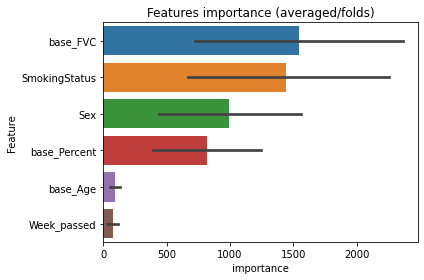

In [81]:
show_feature_importance(feature_importance_df, TARGET)